In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df =pd.read_csv(r'wine.xls',header =None,names =["Alcohol",
"Malic acid",
"Ash",
"Alcalinity of ash",
"Magnesium",
"Total phenols",
"Flavanoids",
"Nonflavanoid phenols",
"Proanthocyanins",
"Color intensity",
"Hue",
"OD280/OD315 of diluted wines",
"Proline"])

In [17]:
df.head()

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
df.reset_index(inplace =True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [12]:
df.isna().sum()

Alcohol                         0
 Malic acid                     0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

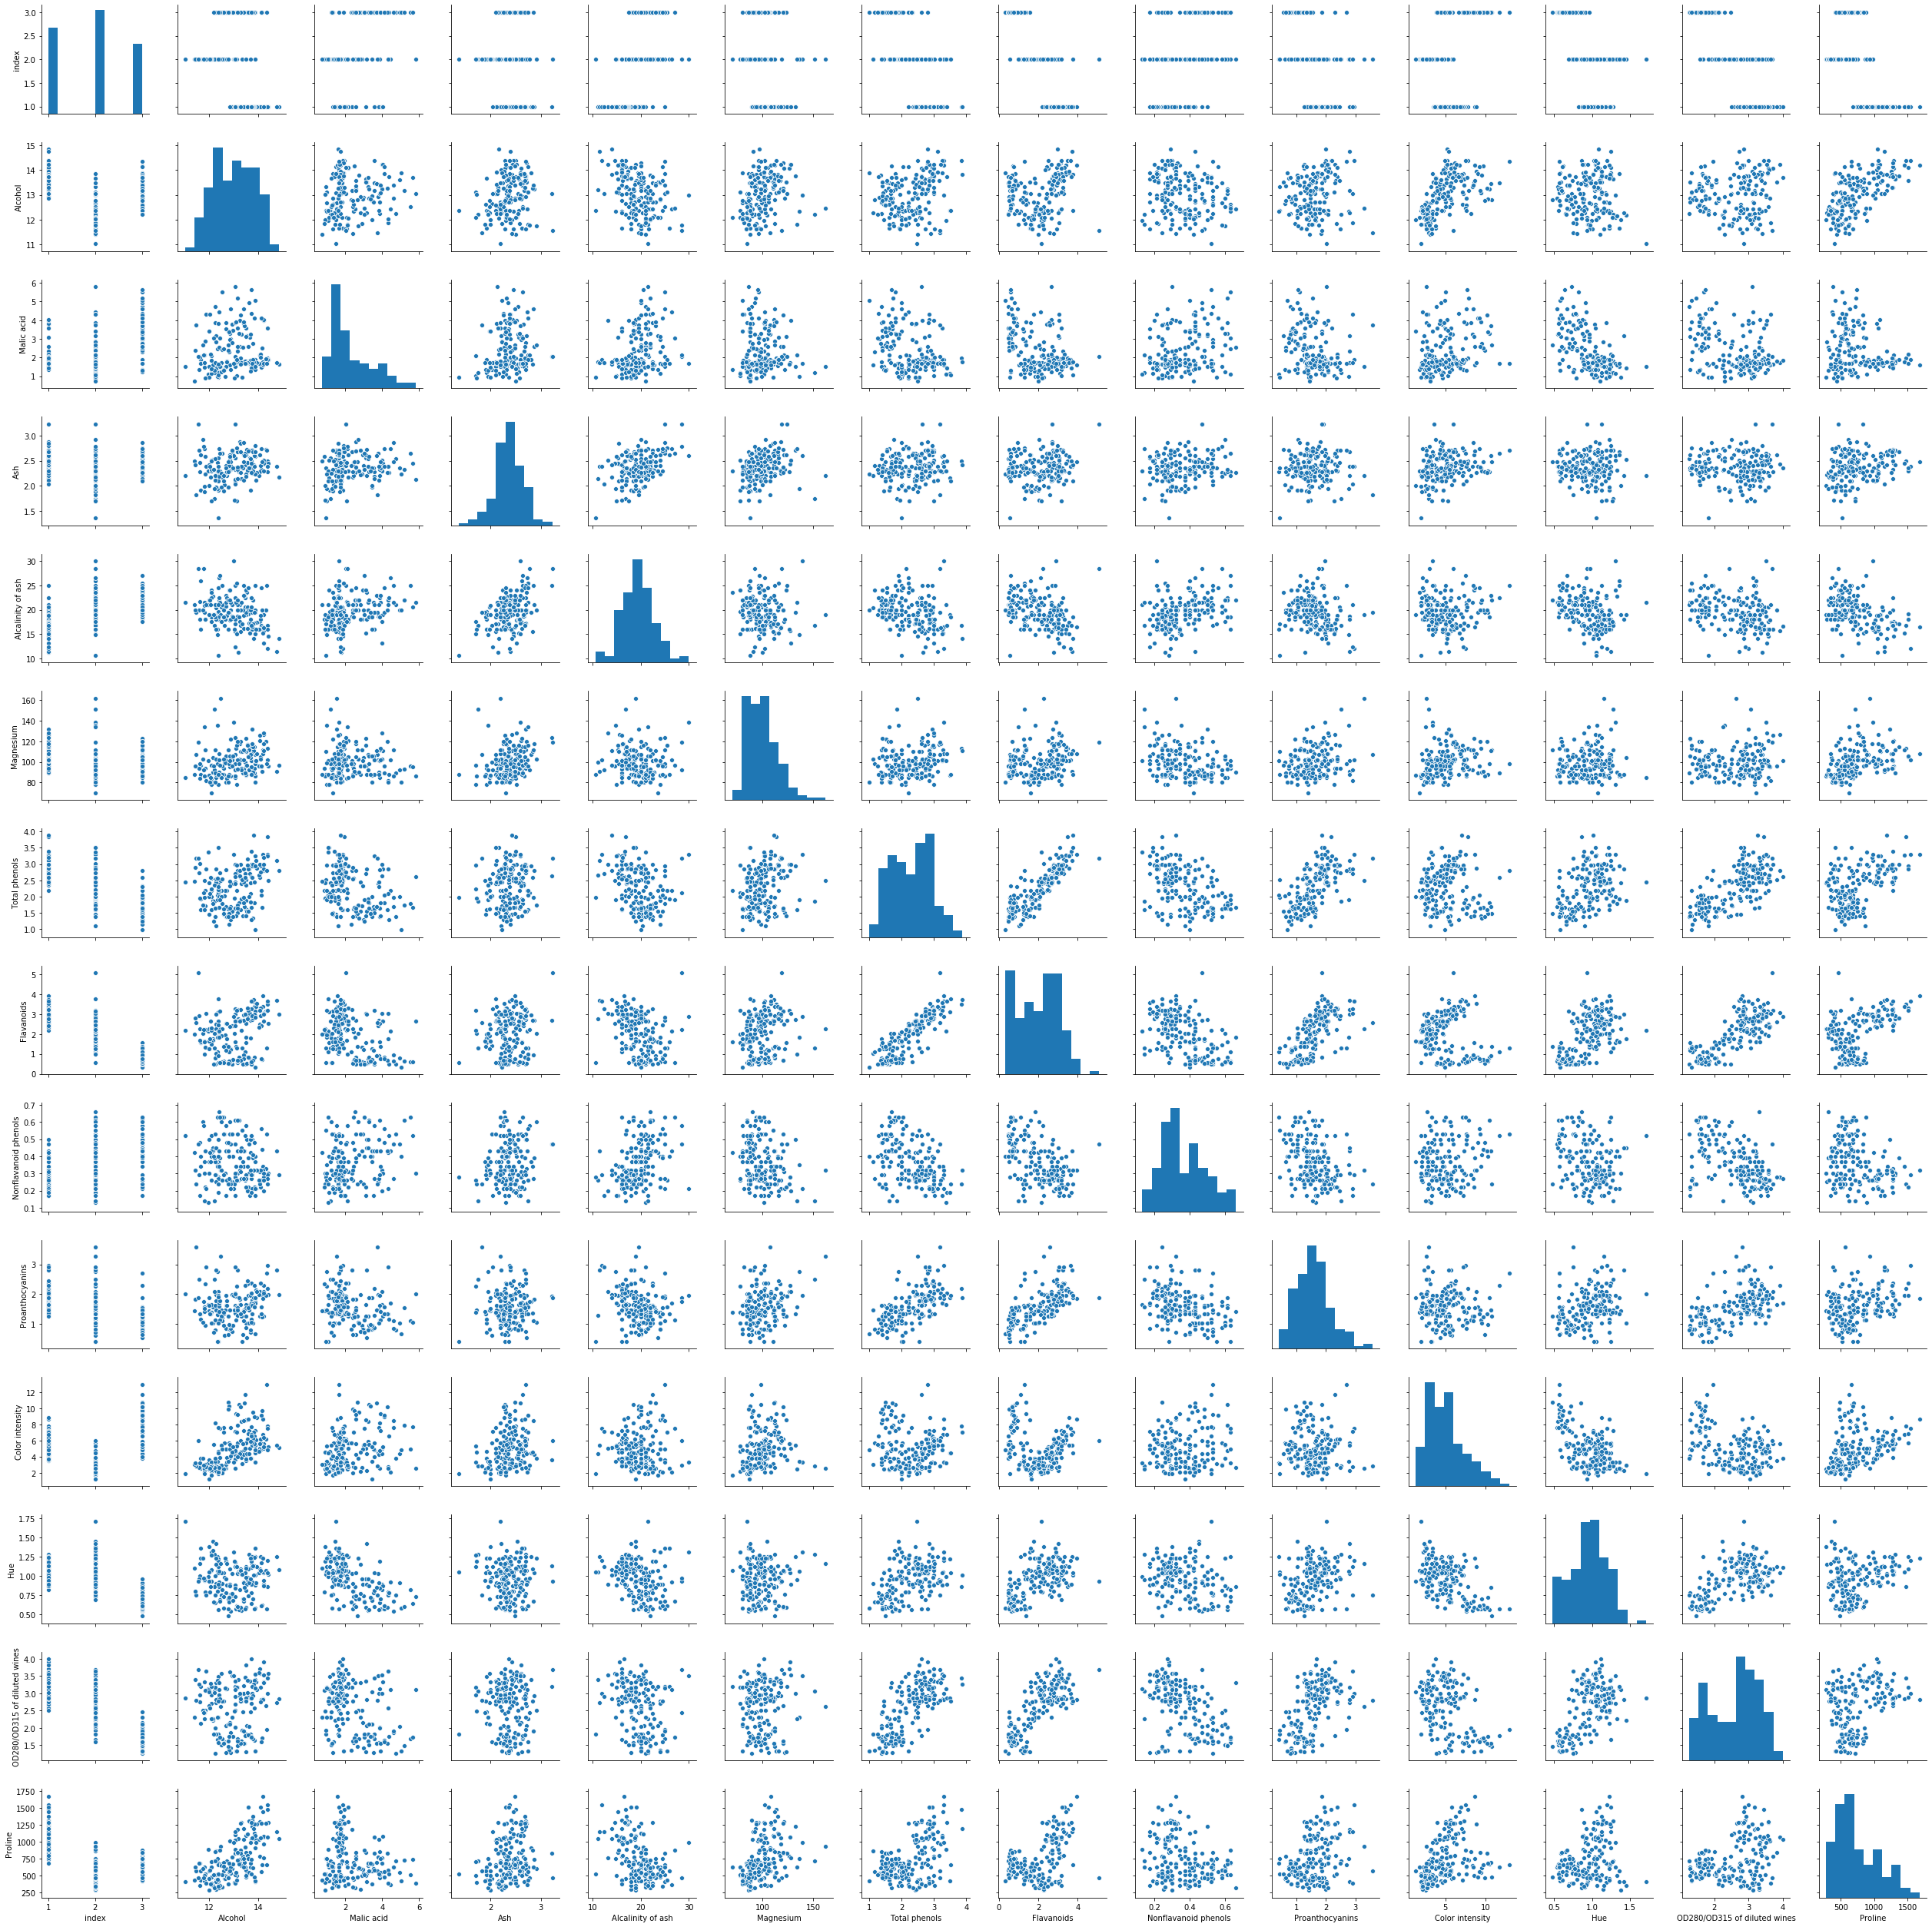

In [21]:
sns.pairplot(df)

In [22]:
x = df.drop(columns ='index')
y = df['index']

In [24]:
from sklearn.preprocessing import StandardScaler
xscaled =StandardScaler().fit_transform(x)

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [27]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(xscaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2314.000000
1,2,1659.007967
2,3,1277.928489
3,4,1175.428333
4,5,1102.488528
5,6,1042.810734
6,7,995.857206
7,8,934.635947
8,9,907.614955
9,10,886.952346


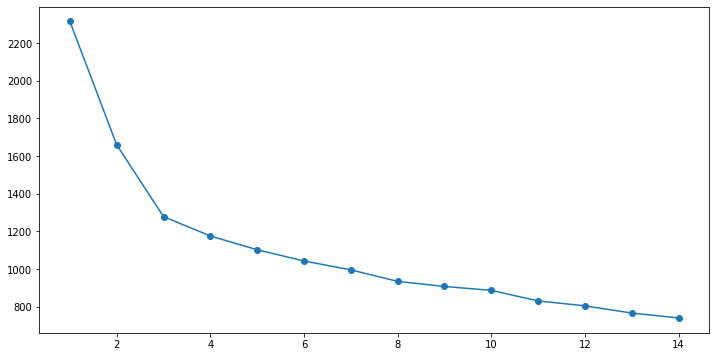

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [29]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [36]:
kmeans.fit(xscaled)

centroids = kmeans.cluster_centers_

centroids

centroid_df = pd.DataFrame(centroids, columns = list(xscaled) )

centroid_df

kmeans.labels_

#pd.DataFrame(kmeans.labels_, columns = "label")

## creating a new dataframe only for labels and converting it into categorical variable
xscaled = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
print(xscaled)
xscaled['labels'] = xscaled['labels'].astype('category')

# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
snail_df_labeled = df.join(xscaled)

snail_df_labeled.head()

df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

snail_df_labeled['labels'].value_counts()   #0-Infant, 1-Female, 2-Male

     labels
0         1
1         1
2         1
3         1
4         1
..      ...
173       2
174       2
175       2
176       2
177       2

[178 rows x 1 columns]


0    65
1    62
2    51
Name: labels, dtype: int64